# Heart Failure Prediction

Cardiovascular diseases are the leading cause of fatalities worldwide, accounting for 32% of all deaths. It is estimated that these diseases cause around 17.9 million deaths each year globally. Heart failure is a common occurrence related to cardiovascular diseases, which occurs when the heart fails to pump enough blood to the body, leading to disruptions in major bodily functions. Heart failure is characterized by a range of symptoms that can weaken the heart, leading to severe health complications.

### Importing the required libraries

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

C:\Users\PC\AppData\Local\Temp\ipykernel_30176\1051671842.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Loading the data

In [2]:
data = pd.read_csv("./heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**About the data:**

- age: Age of the patient
- anaemia: If the patient had the haemoglobin below the normal range
- creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
- diabetes: If the patient was diabetic
- ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
- high_blood_pressure: If the patient had hypertension
- platelets: Platelet count of blood in kiloplatelets/mL
- serum_creatinine: The level of serum creatinine in the blood in mg/dL
- serum_sodium: The level of serum sodium in the blood in mEq/L
- sex: The sex of the patient
- smoking: If the patient smokes actively or ever did in past
- time: It is the time of the patient's follow-up visit for the disease in months
- DEATH_EVENT: If the patient deceased during the follow-up period

### Data Analysis

We begin our analysis by plotting a count plot of the targer attribute. A corelation matrix od the various attributes to examine the feature importance.

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

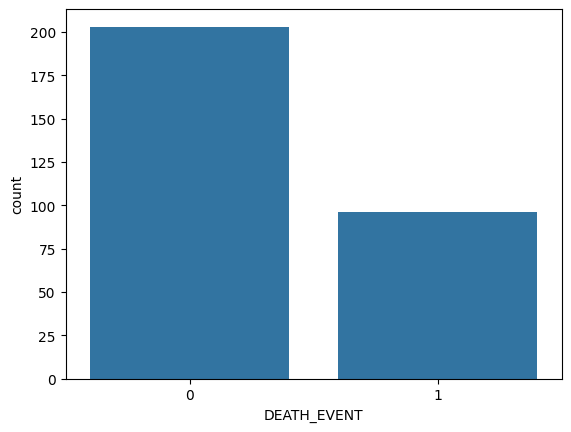

In [4]:
sb.countplot(x= data["DEATH_EVENT"])

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

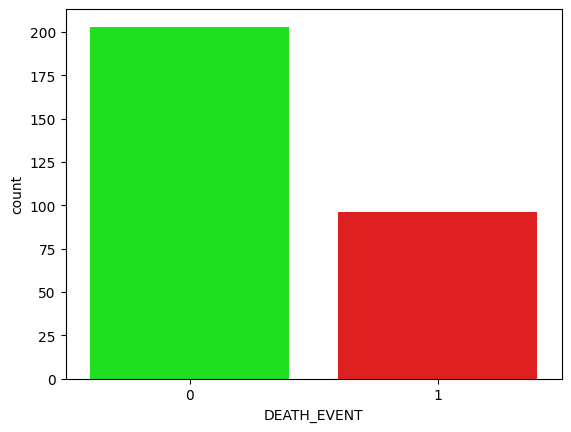

In [5]:
cols= ["#0f0","#f00"]
sb.countplot(x=data["DEATH_EVENT"], hue=data["DEATH_EVENT"], palette=cols, legend=False)

The data is imbalanced (a situation where your dataset has unequal distribution across the target classes)

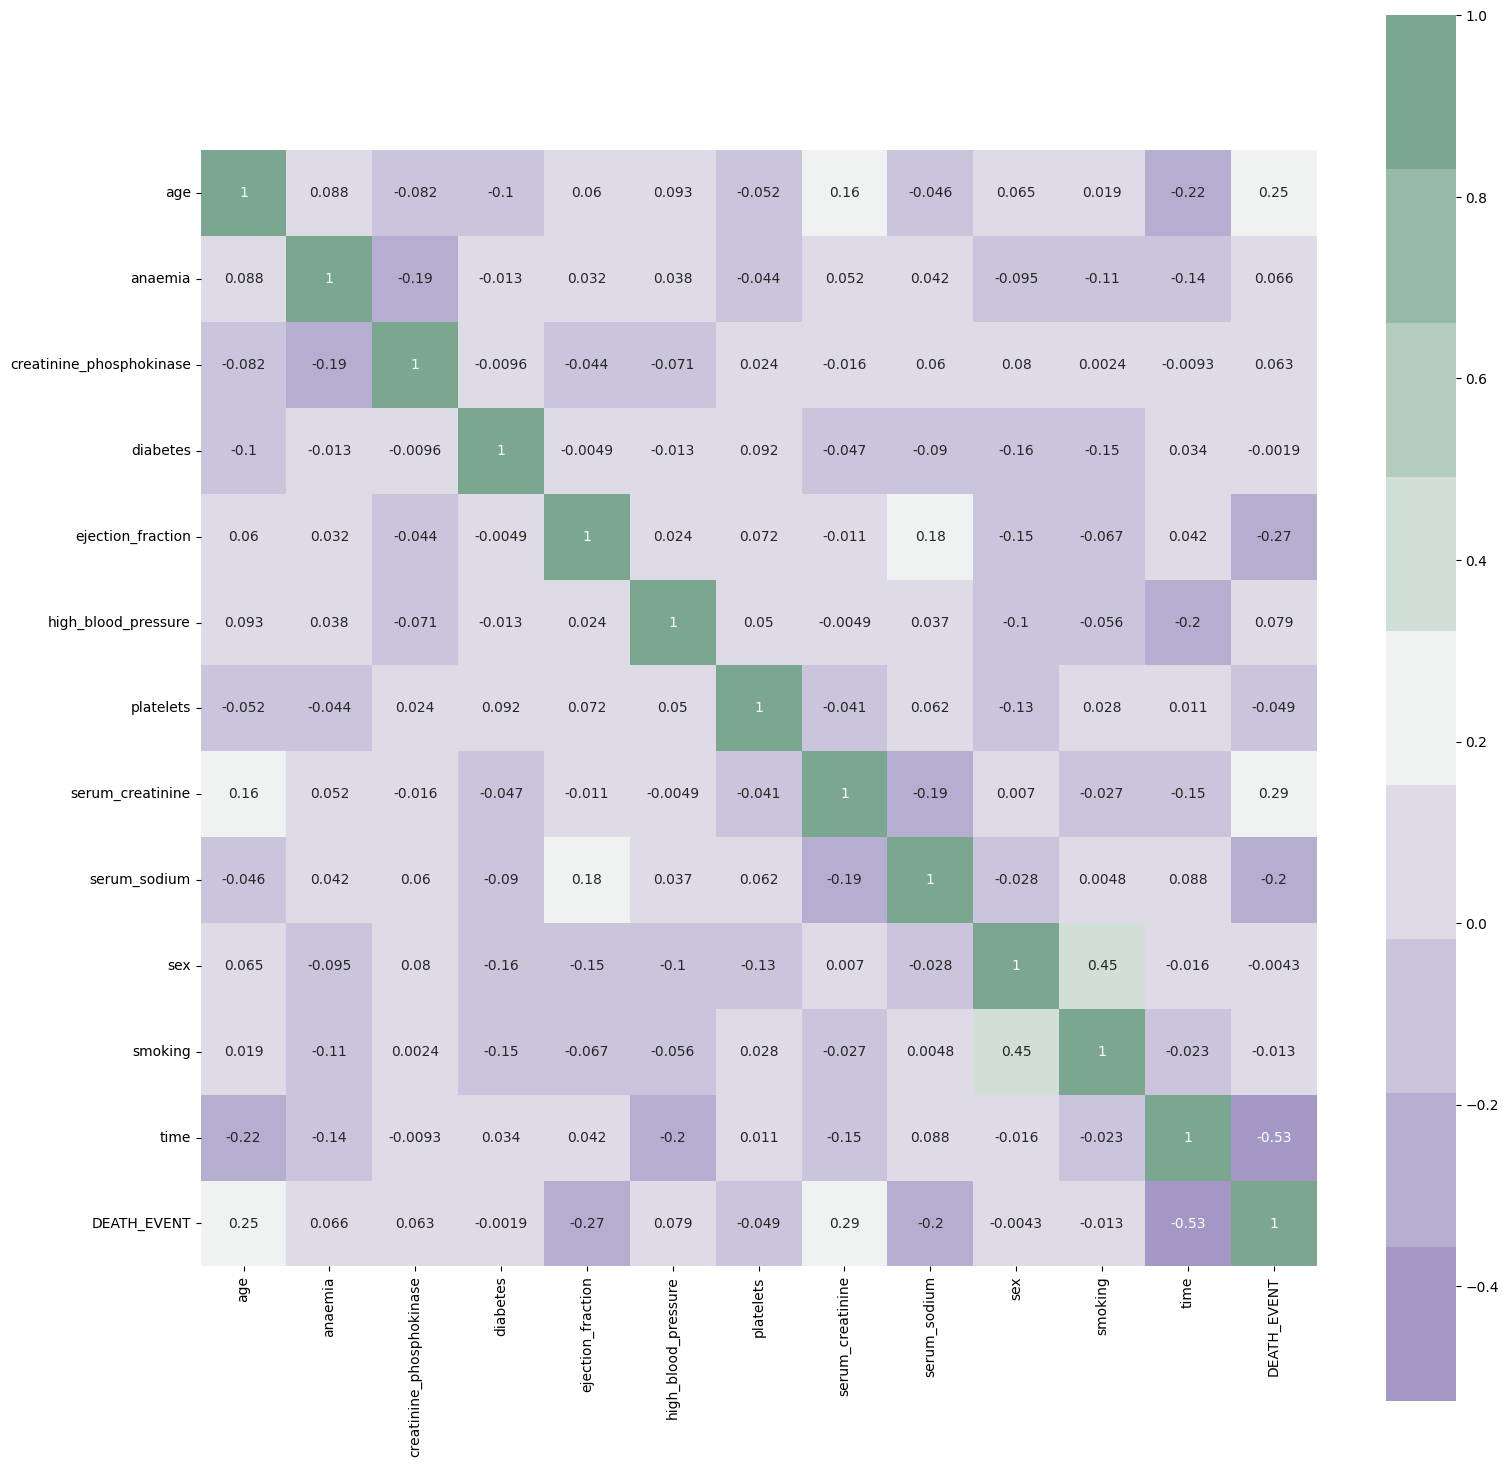

In [6]:
# Examaning a corelation matrix of all the features 
cmap = sb.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sb.heatmap(corrmat,cmap= cmap,annot=True, square=True);

**Notable points:**

- Time of the patient's follow-up visit for the disease is crucial in as initial diagnosis with cardiovascular issue and treatment reduces the chances of any fatality. It holds and inverse relation.
  - Time of follow-up visit: Early diagnosis and treatment of cardiovascular issues significantly improve the chances of survival. This makes the timing of the follow-up visit crucial, as it determines the promptness of intervention.
- Ejection fraction is the second most important feature. It is quite expected as it is basically the efficiency of the heart.
  - Ejection fraction: This is a measure of how effectively the heart pumps blood with each contraction. A lower ejection fraction indicates weaker heart function and hence poorer prognosis. Therefore, it's the second most important feature for predicting outcomes.
- Age of the patient is the third most correlated feature. Clearly as heart's functioning declines with ageing.
  - Age of the patient: Heart function naturally declines with age. Consequently, older patients tend to have a higher risk of complications from cardiovascular diseases. This makes age the third most important feature in your analysis.

Text(0.5, 1.0, 'Distribution Of Age')

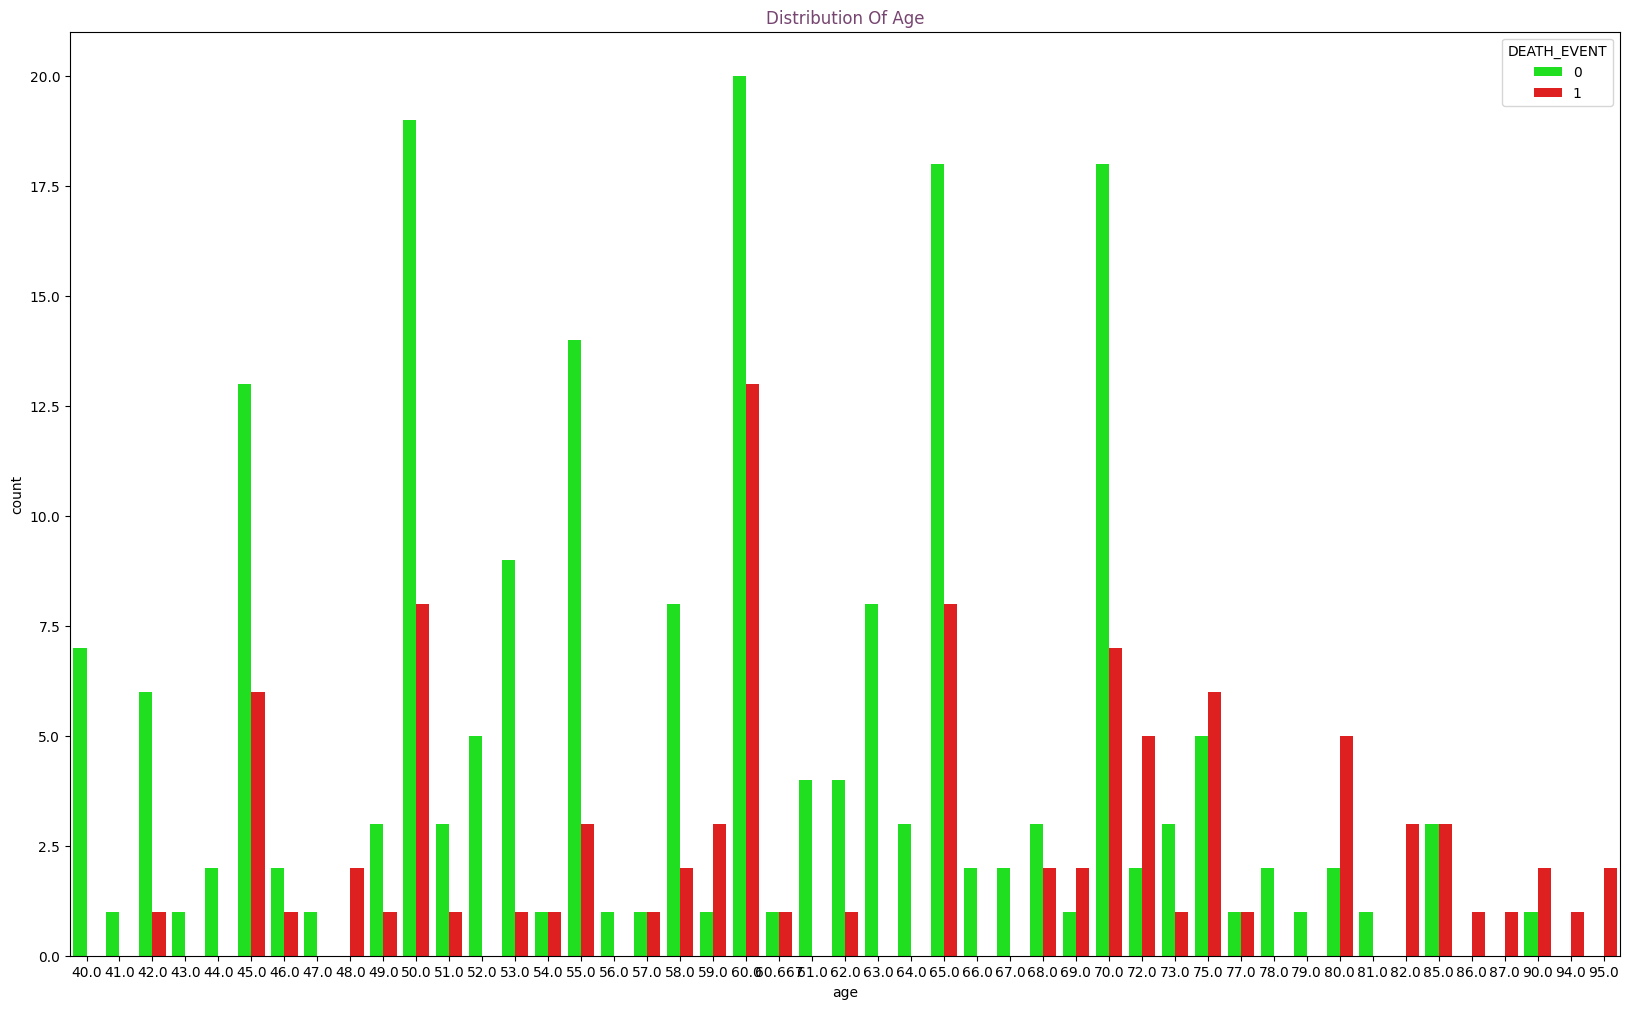

In [7]:
#Evauating age distribution 
plt.figure(figsize=(20,12))
Days_of_week = sb.countplot(x=data['age'],data=data, hue ="DEATH_EVENT", palette=cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


### Data Preprocessing

### Model Building

### Conclusions